In [ ]:
from google.colab import files

# This will open a dialog to select the file from your device
uploaded = files.upload()


Saving DR_Model_2_1.zip to DR_Model_2_1.zip


In [ ]:
import zipfile
import os

# Replace 'Exudates-3 (3)-new.zip' with the actual name of your uploaded file
zip_file = 'DR_Model_2_1.zip'

# Create a directory to extract the contents
extract_dir = '/content/extracted_exudates'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Navigate to the extracted folder
os.chdir(extract_dir)

# List the contents of the directory to confirm extraction
print("Extracted files:")
os.listdir(extract_dir)


Extracted files:


['DR_Model_2_1']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Define paths
train_dir = '/content/extracted_exudates/DR_Model_2_1/train'
valid_dir = '/content/extracted_exudates/DR_Model_2_1/valid'
test_dir = '/content/extracted_exudates/DR_Model_2_1/test'

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 14265 images belonging to 1 classes.
Found 1593 images belonging to 1 classes.
Found 799 images belonging to 1 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 5, 5, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 0, 0, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 0, 0, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 0, 0, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,591,809 (17.52 MB)

 Trainable params: 4,588,801 (17.50 MB)

 Non-trainable params: 3,008 (11.75 KB)

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Layer 1
    BatchNormalization(),  # Layer 2
    MaxPooling2D(2, 2),  # Layer 3

    Conv2D(64, (3, 3), activation='relu'),  # Layer 4
    BatchNormalization(),  # Layer 5
    MaxPooling2D(2, 2),  # Layer 6

    Conv2D(128, (3, 3), activation='relu'),  # Layer 7
    BatchNormalization(),  # Layer 8
    MaxPooling2D(2, 2),  # Layer 9

    Conv2D(256, (3, 3), activation='relu'),  # Layer 10
    BatchNormalization(),  # Layer 11
    MaxPooling2D(2, 2),  # Layer 12

    Conv2D(512, (3, 3), activation='relu'),  # Layer 13
    BatchNormalization(),  # Layer 14
    MaxPooling2D(2, 2),  # Layer 15

    Conv2D(512, (3, 3), activation='relu'),  # Layer 16
    BatchNormalization(),  # Layer 17
    MaxPooling2D(2, 2),  # Layer 18

    Flatten(),  # Layer 19
    Dense(1024, activation='relu'),  # Layer 20
    Dropout(0.5),  # Layer 21

    Dense(512, activation='relu'),  # Layer 22
    Dropout(0.5),  # Layer 23

    Dense(256, activation='relu'),  # Layer 24
    Dropout(0.5),  # Layer 25

    Dense(1, activation='sigmoid')  # Output Layer
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Extracting information and creating the table
layer_data = []

for i, layer in enumerate(model.layers):
    config = layer.get_config()
    layer_type = type(layer).__name__
    maps = config['filters'] if 'filters' in config else '-'
    # Correctly access output_shape
    output_shape = layer.output_shape if hasattr(layer, 'output_shape') else None
    output_size = f"{output_shape[1]} x {output_shape[2]}" if output_shape and len(output_shape) > 2 else '-'
    kernel_size = config['kernel_size'] if 'kernel_size' in config else '-'

    layer_data.append({
        'No.': i + 1,
        'Layer Type': layer_type,
        'Maps': maps,
        'Output Size': output_size,
        'Kernel Size': kernel_size
    })

# Create a DataFrame
df = pd.DataFrame(layer_data)

# Display the table
print(df)


    No.          Layer Type Maps Output Size Kernel Size
0     1              Conv2D   32           -      (3, 3)
1     2  BatchNormalization    -           -           -
2     3        MaxPooling2D    -           -           -
3     4              Conv2D   64           -      (3, 3)
4     5  BatchNormalization    -           -           -
5     6        MaxPooling2D    -           -           -
6     7              Conv2D  128           -      (3, 3)
7     8  BatchNormalization    -           -           -
8     9        MaxPooling2D    -           -           -
9    10              Conv2D  256           -      (3, 3)
10   11  BatchNormalization    -           -           -
11   12        MaxPooling2D    -           -           -
12   13              Conv2D  512           -      (3, 3)
13   14  BatchNormalization    -           -           -
14   15        MaxPooling2D    -           -           -
15   16              Conv2D  512           -      (3, 3)
16   17  BatchNormalization    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks with the correct file extension
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the modified model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Define the input layer with Input() for the sequential model
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Layer 1
    BatchNormalization(),  # Layer 2
    MaxPooling2D(2, 2),  # Layer 3

    Conv2D(64, (3, 3), activation='relu', padding='same'),  # Layer 4
    BatchNormalization(),  # Layer 5
    MaxPooling2D(2, 2),  # Layer 6

    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Layer 7
    BatchNormalization(),  # Layer 8
    MaxPooling2D(2, 2),  # Layer 9

    Conv2D(256, (3, 3), activation='relu', padding='same'),  # Layer 10
    BatchNormalization(),  # Layer 11
    MaxPooling2D(2, 2),  # Layer 12

    Conv2D(512, (3, 3), activation='relu', padding='same'),  # Layer 13
    BatchNormalization(),  # Layer 14
    MaxPooling2D(2, 2),  # Layer 15

    Flatten(),  # Layer 16
    Dense(1024, activation='relu'),  # Layer 17
    Dropout(0.5),  # Layer 18

    Dense(512, activation='relu'),  # Layer 19
    Dropout(0.5),  # Layer 20

    Dense(256, activation='relu'),  # Layer 21
    Dropout(0.5),  # Layer 22

    Dense(1, activation='sigmoid')  # Output Layer
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=11,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/11


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


445/445 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9906 - loss: 0.0348 - val_accuracy: 1.0000 - val_loss: 4.2197e-30
Epoch 2/11
  1/445 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 1.0000 - loss: 2.0031e-38

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.0031e-38 - val_accuracy: 1.0000 - val_loss: 6.1063e-35
Epoch 3/11
445/445 ━━━━━━━━━━━━━━━━━━━━ 56s 46ms/step - accuracy: 1.0000 - loss: 7.8374e-23 - val_accuracy: 1.0000 - val_loss: 4.8240e-28
Epoch 4/11
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 3.9602e-32 - val_accuracy: 1.0000 - val_loss: 7.9926e-37
Epoch 5/11
445/445 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 1.0000 - loss: 7.9382e-22 - val_accuracy: 1.0000 - val_loss: 3.2936e-28
Epoch 6/11
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 9.4535e-28 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/11
445/445 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 1.0000 - loss: 5.2535e-20 - val_accuracy: 1.0000 - val_loss: 5.1448e-28
Epoch 8/11
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 1.0000 - loss: 4.0223e-34 - val_accuracy: 1.0000 - val_loss: 3.3955e-34
Epoch 9/11
445/445 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/ste

In [ ]:
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 2.9863e-28
Validation Accuracy: 100.00%


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 1.0000 - loss: 1.7217e-31
Test Accuracy: 100.00%


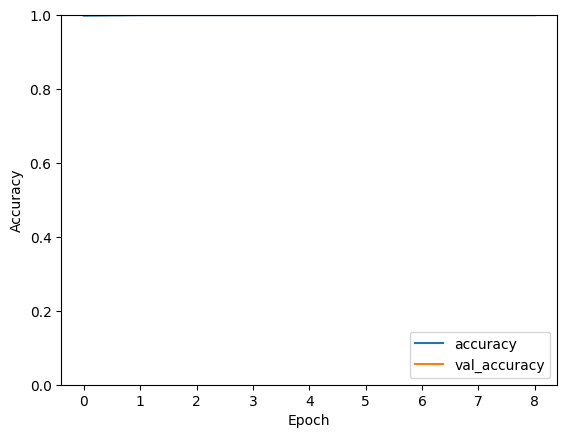

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
model.save('exudate_detection_model.h5')


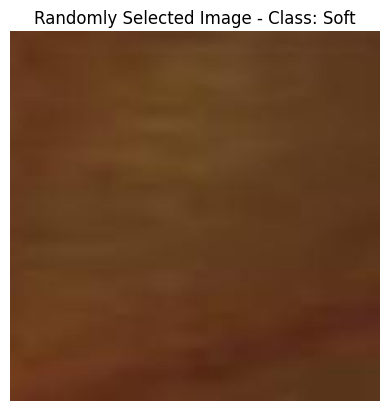

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define paths to the directories containing images for each class
soft_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Soft'   # Replace with your path
hard_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Hard'   # Replace with your path
no_ex_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/No_ex' # Replace with your path

# Dictionary mapping class names to their respective directories
class_dirs = {
    'Soft': soft_dir,
    'Hard': hard_dir,
    'No_ex': no_ex_dir
}

# Randomly select a class
random_class = random.choice(list(class_dirs.keys()))

# Get all image files from the selected class directory
image_files = os.listdir(class_dirs[random_class])
# Filter to include only image files (e.g., .jpg, .png)
image_files = [f for f in image_files if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select an image from the class directory
random_image_file = random.choice(image_files)

# Load and display the selected image
img_path = os.path.join(class_dirs[random_class], random_image_file)
img = Image.open(img_path)

# Display the image with the class label
plt.imshow(img)
plt.axis('off')
plt.title(f'Randomly Selected Image - Class: {random_class}')
plt.show()


15 random images have been downloaded to /content/downloaded_images


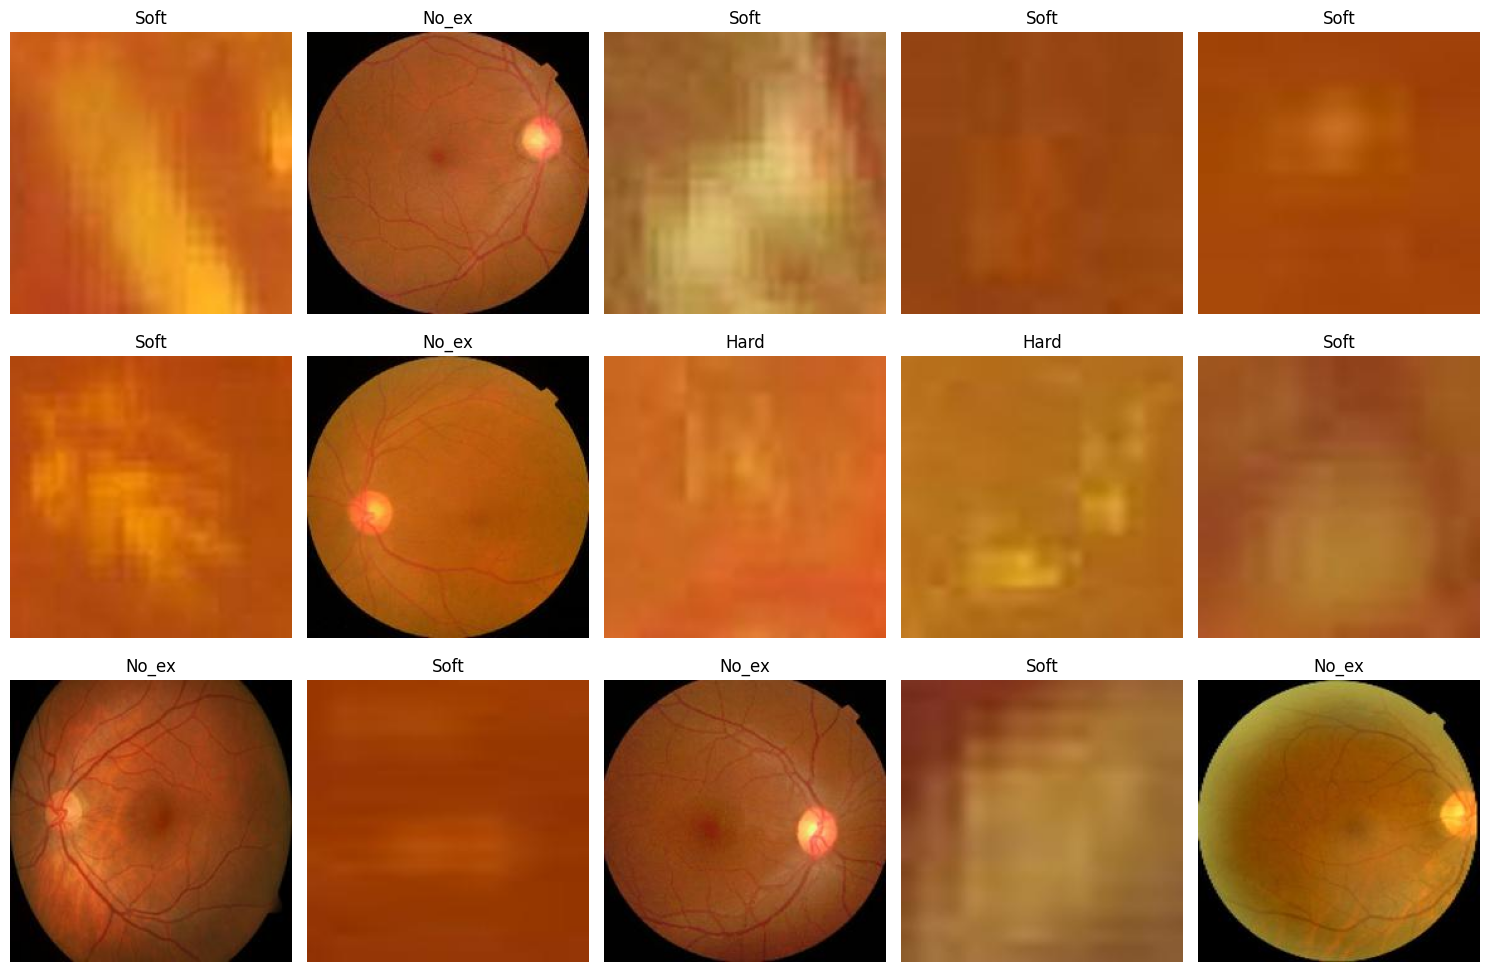

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import shutil

# Define paths to the directories containing images for each class


# Dictionary mapping class names to their respective directories
class_dirs = {
    'Soft': soft_dir,
    'Hard': hard_dir,
    'No_ex': no_ex_dir
}

# Collect all images from the directories
all_images = []
for class_name, dir_path in class_dirs.items():
    image_files = os.listdir(dir_path)
    image_files = [f for f in image_files if f.endswith(('.png', '.jpg', '.jpeg'))]  # Filter image files
    all_images.extend([(class_name, os.path.join(dir_path, img)) for img in image_files])

# Randomly select 15 images
random_images = random.sample(all_images, min(15, len(all_images)))  # Ensures it doesn't error if <15 images

# Directory to save the downloaded images
download_dir = '/content/downloaded_images'  # Change path if needed
os.makedirs(download_dir, exist_ok=True)

# Copy selected images to the download directory
for class_name, img_path in random_images:
    # Generate a filename to avoid duplicates
    filename = f"{class_name}_{os.path.basename(img_path)}"
    save_path = os.path.join(download_dir, filename)
    shutil.copy(img_path, save_path)

print(f"15 random images have been downloaded to {download_dir}")

# Optionally, display the selected images
plt.figure(figsize=(15, 10))
for i, (class_name, img_path) in enumerate(random_images):
    img = Image.open(img_path)
    plt.subplot(3, 5, i + 1)  # Arrange images in a 3x5 grid
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_name)

plt.tight_layout()
plt.show()


15 random images have been downloaded to /content/downloaded_images


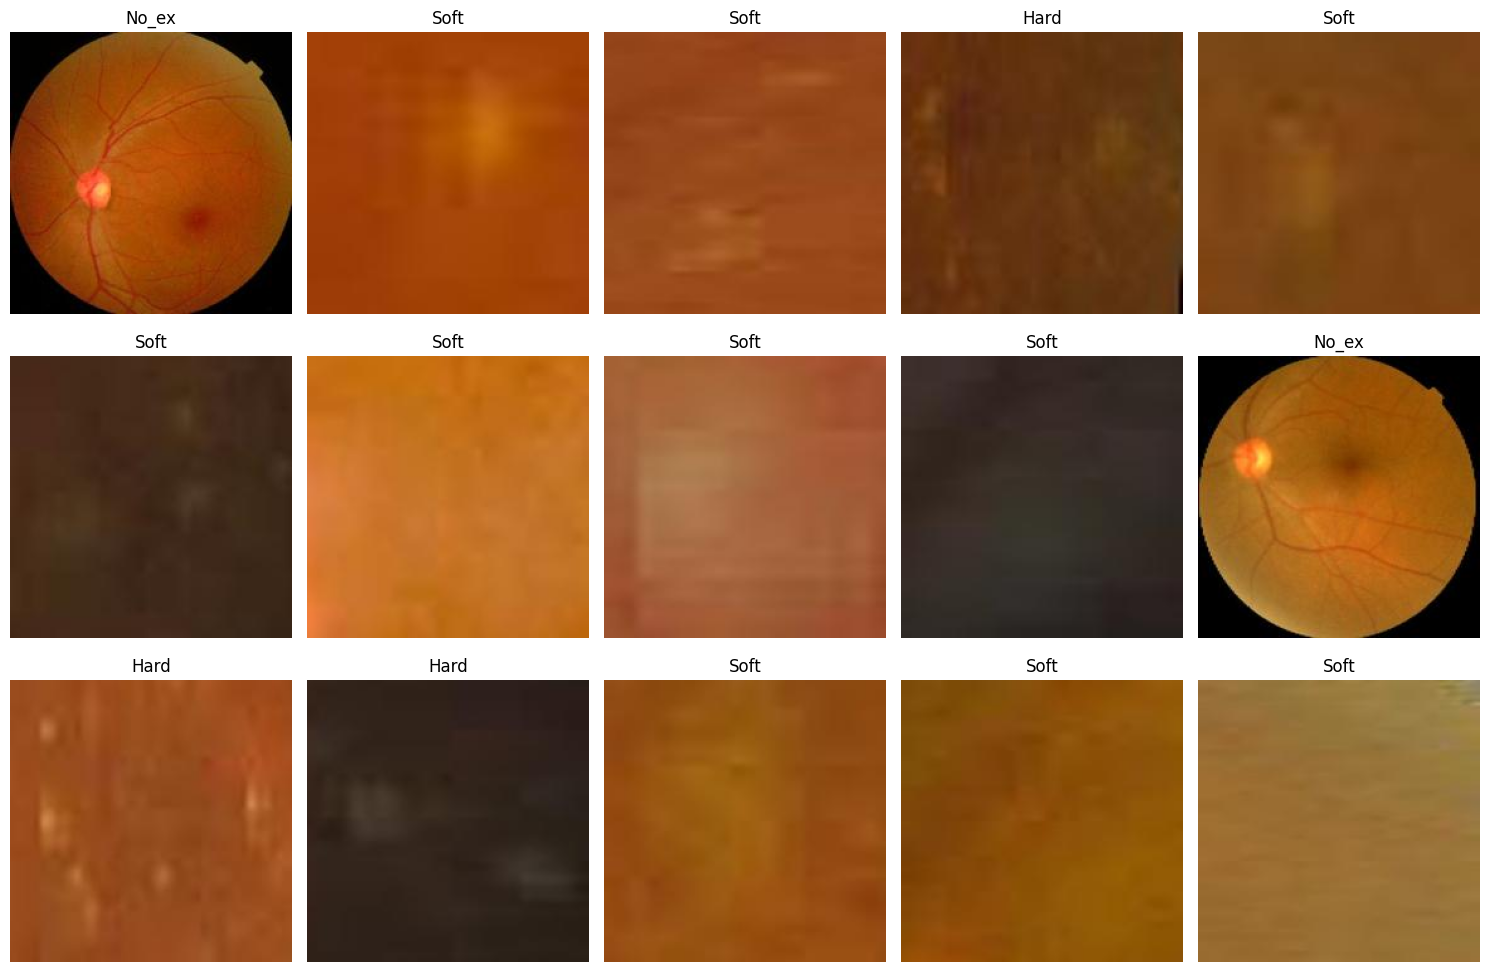

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import shutil

# Define paths to the directories containing images for each class
soft_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Soft'   # Replace with your path
hard_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Hard'   # Replace with your path
no_ex_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/No_ex' # Replace with your path

# Dictionary mapping class names to their respective directories


# Dictionary mapping class names to their respective directories
class_dirs = {
    'Soft': soft_dir,
    'Hard': hard_dir,
    'No_ex': no_ex_dir
}

# Collect all images from the directories
all_images = []
for class_name, dir_path in class_dirs.items():
    image_files = os.listdir(dir_path)
    image_files = [f for f in image_files if f.endswith(('.png', '.jpg', '.jpeg'))]  # Filter image files
    all_images.extend([(class_name, os.path.join(dir_path, img)) for img in image_files])

# Randomly select 15 images
random_images = random.sample(all_images, min(15, len(all_images)))  # Ensures it doesn't error if <15 images

# Directory to save the downloaded images
download_dir = '/content/downloaded_images'  # Change path if needed
os.makedirs(download_dir, exist_ok=True)

# Copy selected images to the download directory
for class_name, img_path in random_images:
    # Generate a filename to avoid duplicates and make it clear
    filename = f"{class_name}_{os.path.basename(img_path)}"
    save_path = os.path.join(download_dir, filename)
    shutil.copy(img_path, save_path)

print(f"15 random images have been downloaded to {download_dir}")

# Display the selected images
plt.figure(figsize=(15, 10))
for i, (class_name, img_path) in enumerate(random_images):
    img = Image.open(img_path)
    plt.subplot(3, 5, i + 1)  # Arrange images in a 3x5 grid
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_name)

plt.tight_layout()
plt.show()


Saving image130_png.rf.85a016cb3d8f6ebb601babd8281c8e41_14_3.jpg to image130_png.rf.85a016cb3d8f6ebb601babd8281c8e41_14_3.jpg


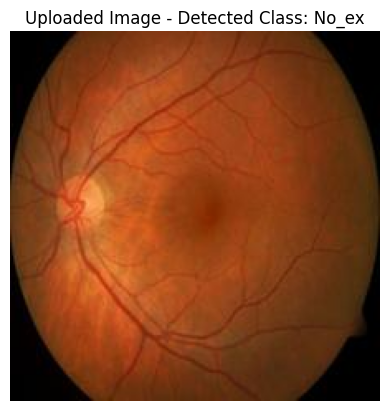

The uploaded image belongs to the 'No_ex' class.


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Define paths to the directories containing images for each class
soft_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Soft'   # Replace with your path
hard_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Hard'   # Replace with your path
no_ex_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/No_ex' # Replace with your path

# Dictionary mapping class names to their respective directories
class_dirs = {
    'Soft': soft_dir,
    'Hard': hard_dir,
    'No_ex': no_ex_dir
}

# Upload an image
uploaded = files.upload()

# Get the file name of the uploaded image
for filename in uploaded.keys():
    img_path = filename

# Check which class the image belongs to by searching the directories
detected_class = None
for class_name, directory in class_dirs.items():
    if img_path in os.listdir(directory):
        detected_class = class_name
        break

# Load and display the uploaded image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Uploaded Image - Detected Class: {detected_class if detected_class else "Unknown"}')
plt.show()

if detected_class:
    print(f"The uploaded image belongs to the '{detected_class}' class.")
else:
    print("The uploaded image does not belong to any known class directory.")


Saving d868acdccb5b_png.rf.6424853d0a27dff95d01d47d822501e4_316_0.jpg to d868acdccb5b_png.rf.6424853d0a27dff95d01d47d822501e4_316_0.jpg


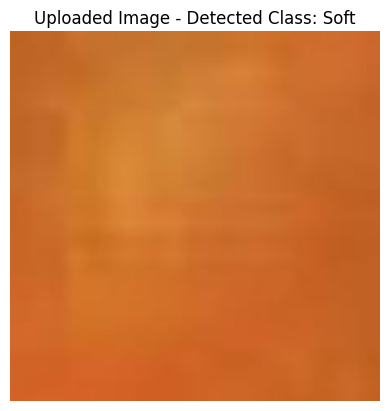

The uploaded image belongs to the 'Soft' class.


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Define paths to the directories containing images for each class
soft_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Soft'   # Replace with your path
hard_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Hard'   # Replace with your path
no_ex_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/No_ex' # Replace with your path

# Dictionary mapping class names to their respective directories
class_dirs = {
    'Soft': soft_dir,
    'Hard': hard_dir,
    'No_ex': no_ex_dir
}

# Upload an image
uploaded = files.upload()

# Get the file name of the uploaded image
for filename in uploaded.keys():
    img_path = filename

# Check which class the image belongs to by searching the directories
detected_class = None
for class_name, directory in class_dirs.items():
    if img_path in os.listdir(directory):
        detected_class = class_name
        break

# Load and display the uploaded image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Uploaded Image - Detected Class: {detected_class if detected_class else "Unknown"}')
plt.show()

if detected_class:
    print(f"The uploaded image belongs to the '{detected_class}' class.")
else:
    print("The uploaded image does not belong to any known class directory.")


Saving d868acdccb5b_png.rf.6424853d0a27dff95d01d47d822501e4_266_35.jpg to d868acdccb5b_png.rf.6424853d0a27dff95d01d47d822501e4_266_35.jpg


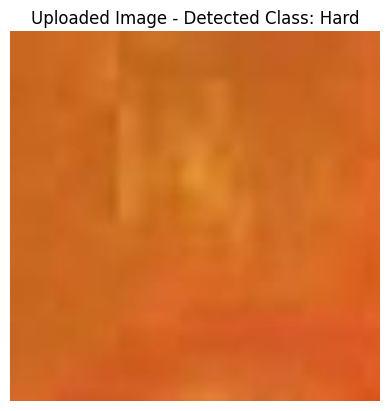

The uploaded image belongs to the 'Hard' class.


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Define paths to the directories containing images for each class
soft_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Soft'   # Replace with your path
hard_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/Hard'   # Replace with your path
no_ex_dir = '/content/extracted_exudates/DR_Model_2_1/test/output_test/No_ex' # Replace with your path

# Dictionary mapping class names to their respective directories
class_dirs = {
    'Soft': soft_dir,
    'Hard': hard_dir,
    'No_ex': no_ex_dir
}

# Upload an image
uploaded = files.upload()

# Get the file name of the uploaded image
for filename in uploaded.keys():
    img_path = filename

# Check which class the image belongs to by searching the directories
detected_class = None
for class_name, directory in class_dirs.items():
    if img_path in os.listdir(directory):
        detected_class = class_name
        break

# Load and display the uploaded image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Uploaded Image - Detected Class: {detected_class if detected_class else "Unknown"}')
plt.show()

if detected_class:
    print(f"The uploaded image belongs to the '{detected_class}' class.")
else:
    print("The uploaded image does not belong to any known class directory.")
